# DOES PERSONALITY CO-DEVELOP IN FAMILIES?

This notebook does a few things. A) It processes the data to a more friendly format (including joining the W13 data to the rest), B) it converts the likert answers to numerical values, C) it handles reversals, D) it parcels the data as per prior CFP studies, and E) it centers each parcel to the baseline wave for each person-role (Mom, Dad, Child.)

### Housekeeping:

In [1]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [2]:
import pandas as pd
import numpy as np

### Getting the data:

In [3]:
maindf = pd.read_spss("../../CFP_DATA/Evan Warfel CFP Data File (7-4-23).sav")

In [4]:
maindf

,FAMID,C00Gender,C00GenStat,C00Nativity,C01xactage,C02xactage,C03xactage,C04xactage,C05xactage,C06xactage,...,d12bfi251,d12bfi252,d12bfi253,d12bfi254,d12bfi255,d12bfi256,d12bfi257,d12bfi258,d12bfi259,d12bfi260
0,7290.0,male,1st generation (born in Mexico),Born in Mexico (1st Gen),10.808219,NaN,12.879452,13.989041,15.030137,16.065753,...,Disagree [2],Agree [3],Agree [3],Disagree [2],Agree [3],Agree [3],Agree [3],Disagree [2],Strongly disagree [1],Strongly agree [4]
1,7513.0,male,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),10.509589,11.479452,12.468493,13.473973,15.180822,16.167123,...,Disagree [2],Agree [3],Strongly agree [4],Strongly disagree [1],Agree [3],Agree [3],Strongly agree [4],Disagree [2],Disagree [2],Strongly agree [4]
2,8901.0,male,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),10.347945,11.506849,12.317808,13.846575,14.882192,15.816438,...,Disagree [2],Agree [3],Agree [3],Disagree [2],Agree [3],Agree [3],Disagree [2],Agree [3],Agree [3],Disagree [2]
3,8444.0,male,1st generation (born in Mexico),Born in Mexico (1st Gen),10.720548,11.490411,12.463014,NaN,14.884932,15.934247,...,Disagree [2],Agree [3],Agree [3],Disagree [2],Disagree [2],Agree [3],Agree [3],Disagree [2],Disagree [2],Agree [3]
4,7522.0,female,1st generation (born in Mexico),Born in Mexico (1st Gen),10.079452,11.106849,12.175342,13.128767,14.852055,15.739726,...,Agree [3],Disagree [2],Agree [3],Disagree [2],Agree [3],Disagree [2],Agree [3],Disagree [2],Agree [3],Agree [3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,6292.0,female,1st generation (born in Mexico),Born in Mexico (1st Gen),10.578082,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5517.0,female,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),11.846575,NaN,13.947945,14.854795,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,5355.0,female,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),11.383562,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,5235.0,male,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),11.457534,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
maindf['FAMID'] = maindf['FAMID'].astype(int)

In [6]:
maindf = maindf.sort_values('FAMID')

In [7]:
w13 = pd.read_spss("../../CFP_DATA/Evan Warfel CFP Data File (1-12-24).sav")

In [13]:
w13['FAMID'] = w13['FAMID'].astype(int)

In [14]:
w13 = w13.sort_values(['FAMID','PID'])

In [35]:
w13[['FAMID','PID']].groupby('FAMID')['PID'].apply(list).value_counts()

PID
[10.0, 20.0, 30.0]    215
[10.0, 20.0]          213
[10.0]                 47
[20.0]                 38
[20.0, 30.0]           23
[10.0, 20.0, 31.0]     15
[10.0, 30.0]           12
[10.0, 21.0]            2
[10.0, 20.0, 32.0]      1
[10.0, 21.0, 31.0]      1
[21.0, 30.0]            1
[10.0, 20.0, 21.0]      1
[20.0, 31.0]            1
[30.0]                  1
Name: count, dtype: int64

In [21]:
W13_PersonalityColumns = w13.columns.values.tolist()[4:]

In [27]:
def ProcessFamily(FamilyRows):
    family_data = {}
    for _, row in FamilyRows.iterrows():
        # Update age fields based on PID
        if row['PID'] == 10:
            family_data['C13xactage'] = row['w13age']
        elif row['PID'] == 20 or row['PID'] == 21:
            family_data['m13xactage'] = row['w13age']
        elif row['PID'] == 30 or row['PID'] == 31 or row['PID'] == 32:
            family_data['d13xactage'] = row['w13age']
        
        # Update the rest of the data
        for col in W13_PersonalityColumns:
            if col not in family_data or pd.isna(family_data[col]):
                if ~pd.isna(row[col]):
                    family_data[col] = row[col]

    return family_data

In [28]:
new_df = w13.groupby('FAMID').apply(ProcessFamily)

In [29]:
dict_data = new_df.to_dict()

In [30]:
dict_data = new_df.to_dict()
df = pd.DataFrame.from_dict(dict_data, orient='index')

In [73]:
##

In [34]:
maindf = maindf.set_index('FAMID')

In [35]:
#df = df.set_index('FAMID')

In [36]:
full_df = maindf.join(df,how='left',rsuffix='-y')

In [37]:
full_df.columns.tolist()[0:30]

['C00Gender',
 'C00GenStat',
 'C00Nativity',
 'C01xactage',
 'C02xactage',
 'C03xactage',
 'C04xactage',
 'C05xactage',
 'C06xactage',
 'C07xactage',
 'C08xactage',
 'C09xactage',
 'C10xactage',
 'C11xactage',
 'C12xactage',
 'm01xactage',
 'm02xactage',
 'm03xactage',
 'm04xactage',
 'm05xactage',
 'm06xactage',
 'm07xactage',
 'm08xactage',
 'm09xactage',
 'm10xactage',
 'm11xactage',
 'm12xactage',
 'd01xactage',
 'd03xactage',
 'd05xactage']

In [38]:
full_df['C00Gender'].value_counts()

C00Gender
male      338
female    336
Name: count, dtype: int64

In [39]:
full_df

,C00Gender,C00GenStat,C00Nativity,C01xactage,C02xactage,C03xactage,C04xactage,C05xactage,C06xactage,C07xactage,...,d13bfi253,d13bfi254,d13bfi255,d13bfi256,d13bfi257,d13bfi258,d13bfi259,d13bfi260,m13xactage,d13xactage
FAMID,,,,,,,,,,,,,,,,,,,,,
5012,male,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),11.087671,11.964384,12.852055,13.791781,14.635616,15.635616,16.745205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.375342,NaN
5014,male,3rd generation (born in US and both parents bo...,Born in US (2nd+ generation),10.509589,11.726027,12.586301,13.619178,14.545205,15.750685,16.942466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.276712,NaN
5030,female,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),10.035616,NaN,12.471233,13.641096,14.641096,15.443836,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5031,female,1st generation (born in Mexico),Born in Mexico (1st Gen),10.213699,NaN,12.284932,13.301370,14.167123,15.219178,16.257534,...,Agree [3],Disagree [2],Agree [3],Disagree [2],Agree [3],Agree [3],Disagree [2],Agree [3],50.961644,50.906849
5041,male,1st generation (born in Mexico),Born in Mexico (1st Gen),11.065753,NaN,13.167123,14.317808,15.142466,16.216438,17.232877,...,Agree [3],Strongly disagree [1],Agree [3],Agree [3],Agree [3],Strongly disagree [1],Agree [3],Disagree [2],49.452055,47.441096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,male,3rd generation (born in US and both parents bo...,Born in US (2nd+ generation),11.227397,12.052055,NaN,14.471233,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.923288,NaN
8572,female,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),10.838356,11.643836,12.602740,13.446575,14.446575,15.594521,16.424658,...,Agree [3],Disagree [2],Agree [3],Agree [3],Agree [3],Agree [3],Disagree [2],Agree [3],52.769863,57.027397
8900,female,2nd generation (born in US and 1 parent born i...,Born in US (2nd+ generation),11.093151,12.016438,12.989041,13.865753,14.802740,15.961644,16.767123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.276712,NaN


In [40]:
ParentAgesAtWave1 = full_df[['m01xactage','d01xactage']]

In [41]:
ChildGender = full_df['C00Gender']
ChildGender.to_csv("ChildGender.csv",index=True)

In [42]:
sum(pd.isna(ChildGender))

0

In [43]:
sum(pd.isna(full_df['C00Nativity']))

3

In [44]:
pwd!

'/Users/evan/Dropbox/Academia/Projects/ParentChildCoDevelopment/MainAnalyses/FinalAnalysisPipeline'

In [62]:
#18-26;26-35;35-60;60+

SyntaxError: invalid syntax (121691394.py, line 1)

In [45]:
#ParentAgesAtWave1['m01xactage'].hist()

In [46]:
#ParentAgesAtWave1.to_csv("ParentAgesAtWave1.csv",index=True) 

In [39]:
!pwd

/Users/Evan/Dropbox/Academia/Projects/ParentChildCoDevelopment/MainAnalyses/FinalAnalysisPipeline


In [47]:
full_df.to_csv("JoinedData_6_26_2024__NotParcled.csv")#full_df.to_csv("JoinedData_2_14_2024.csv")

## ....

In [3]:
import pandas as pd
full_df = pd.read_csv("../Data/JoinedData_6_26_2024__NotParcled.csv")

In [4]:
df = full_df.copy(deep=True)#pd.read_csv("JoinedData_2_14_2024.csv")

In [5]:
selected_columns = df.columns[df.columns.str.contains('age') & df.columns.str.contains('C')]

In [8]:
LatentSlopeWeights_Part1 = df[selected_columns].mean().round(6)

In [9]:
LatentSlopeWeights_Part1 

C01xactage    10.864140
C02xactage    11.840500
C03xactage    12.808561
C04xactage    13.797835
C05xactage    14.754661
C06xactage    15.799299
C07xactage    16.799982
C08xactage    17.726443
C09xactage    18.751590
C10xactage    19.857595
C11xactage    21.742440
C12xactage    23.182042
C13xactage    26.134479
dtype: float64

In [10]:
FullTrajecoryAgeDiff = LatentSlopeWeights_Part1['C13xactage']-LatentSlopeWeights_Part1['C01xactage']

In [11]:
MiddleOfFullTrajectoryAge = LatentSlopeWeights_Part1['C01xactage'] + FullTrajecoryAgeDiff/2

In [12]:
MiddleOfFullTrajectoryAge

18.4993095

In [13]:
MiddleOfFullTrajectoryAge
Weights = LatentSlopeWeights_Part1 - MiddleOfFullTrajectoryAge 

In [14]:
Weights = LatentSlopeWeights_Part1 - MiddleOfFullTrajectoryAge 
WEIGHTS = Weights/10

WEIGHTS.round(3)
#WEIGHTS FOR THE FULL PARENT TRAJECTORIES

C01xactage   -0.764
C02xactage   -0.666
C03xactage   -0.569
C04xactage   -0.470
C05xactage   -0.374
C06xactage   -0.270
C07xactage   -0.170
C08xactage   -0.077
C09xactage    0.025
C10xactage    0.136
C11xactage    0.324
C12xactage    0.468
C13xactage    0.764
dtype: float64

In [15]:
ChildTrajecoryAgeDiff = LatentSlopeWeights_Part1['C13xactage']-LatentSlopeWeights_Part1['C05xactage']

In [16]:
 LatentSlopeWeights_Part1['C05xactage'] + ChildTrajecoryAgeDiff/2

20.44457

In [19]:
ChildWeightsFromW5 = LatentSlopeWeights_Part1- ( LatentSlopeWeights_Part1['C05xactage'] + ChildTrajecoryAgeDiff/2)

In [23]:
ChildWeightsFromW5_By10= ChildWeightsFromW5/10
ChildWeightsFromW5_By10.round(3)

C01xactage   -0.958
C02xactage   -0.860
C03xactage   -0.764
C04xactage   -0.665
C05xactage   -0.569
C06xactage   -0.465
C07xactage   -0.364
C08xactage   -0.272
C09xactage   -0.169
C10xactage   -0.059
C11xactage    0.130
C12xactage    0.274
C13xactage    0.569
dtype: float64

In [24]:
FatherFullWeights = LatentSlopeWeights_Part1 - 16.80

In [1]:
FatherFullWeights/10 #see notebook 3

NameError: name 'FatherFullWeights' is not defined

In [51]:
full_df['M01HHSize'].to_csv("MotherW1HouseholdSize.csv")

### Data Cleaning

In [52]:
Colz = full_df.columns

In [53]:
AllPersonalityColumns = Colz[full_df.columns.str.contains('bfi')]

In [54]:
full_df[AllPersonalityColumns].stack().value_counts()

Agree [3]                137118
Agree                    133440
Disagree                  67382
Disagree  [2]             47675
Disagree [2]              45666
Strongly agree            37380
Strongly agree [4]        30117
Strongly disagree [1]     22218
Strongly disagree         20062
Name: count, dtype: int64

In [192]:
df = full_df.copy(deep=True)

In [55]:
ReplacementDict = {'Agree [3]':'Agree',
                   'Disagree  [2]':'Disagree',
                   'Disagree [2]':'Disagree',
                   'Strongly agree [4]':'Strongly agree',
                   'Strongly disagree [1]':'Strongly disagree'}

In [56]:
df = df.replace(ReplacementDict )

In [57]:
df[AllPersonalityColumns].stack().value_counts().index.tolist()

['Agree', 'Disagree', 'Strongly agree', 'Strongly disagree']

In [63]:
COLZ = df.columns

In [64]:
COLZ[COLZ.str.contains('M')]

Index(['M01EdLvl_Corrected', 'M01INCOME', 'M01HHSize', 'M03bfin01',
       'M03bfin02', 'M03bfin03', 'M03bfin04', 'M03bfin05', 'M03bfin06',
       'M03bfin07', 'M03bfin08', 'M03bfin09', 'M03bfin10', 'M03bfin11',
       'M03bfin12', 'M03bfin13', 'M03bfin14', 'M03bfin15', 'M03bfin16',
       'M03bfin17', 'M03bfin18', 'M03bfin19', 'M03bfin20', 'M03bfin21',
       'M03bfin22', 'M03bfin23', 'M03bfin24', 'M03bfin25', 'M03bfin26',
       'M03bfin27', 'M03bfin28', 'M03bfin29', 'M03bfin30', 'M03bfin31',
       'M03bfin32', 'M03bfin33', 'M03bfin34', 'M03bfin35', 'M03bfin36',
       'M03bfin37', 'M03bfin38', 'M03bfin39', 'M03bfin40', 'M03bfin41',
       'M03bfin42', 'M03bfin43', 'M03bfin44'],
      dtype='object')

In [66]:
COLZ = COLZ.str.replace('M03','m03')

In [67]:
df.columns = COLZ

In [68]:
COLLZ = df.columns#.str.contains('M')]

In [69]:
COLLZ[COLLZ.str.contains('M')]

Index(['M01EdLvl_Corrected', 'M01INCOME', 'M01HHSize'], dtype='object')

### Item Scoring & Item Reversal:

In [72]:
BFIN = ['bfin' + str(x).zfill(2) for x in range(1,45)]
BFI2 = ['bfi2' + str(x).zfill(2) for x in range(1,61)]

In [73]:
ChildWaves = ['c' + str(x).zfill(2) for x in [5,7,10,11,12,13]]
MomWaves = ['m'+str(x).zfill(2) for x in [1,3,5,7,10,11,12,13]]
DadWaves = ['d'+str(x).zfill(2) for x in [1,3,5,7,11,12,13]]

In [74]:
ChildWaves

['c05', 'c07', 'c10', 'c11', 'c12', 'c13']

In [76]:
#Item reversals and Item=>Domain mappings:
BFI_Mapping = {"Extraversion":[ "01","06R","11", "16", "21R", "26", "31R", "36"],
                "Agreeableness":["02R", "07", "12R", "17","22", "27R", "32", "37R", "42"],
                "Conscientiousness": ["03", "08R", "13", "18R", "23R", "28", "33", "38", "43R"],
                "Neuroticism": ["04", "09R", "14", "19", "24R", "29", "34R", "39"],
                "Openness": ["05", "10", "15", "20", "25", "30", "35R", "40", "41R", "44"]}
    
BFI2_Mapping = {"Extraversion": ["01", "06", "11R", "16R", "21", "26R", "31R", "36R", "41", "46", "51R", "56"],
            "Agreeableness": ["02", "07", "12R", "17R", "22R", "27", "32", "37R", "42R", "47R", "52", "57"],
            "Conscientiousness": ["03R", "08R", "13", "18", "23R", "28R", "33", "38", "43", "48R", "53", "58R"],
            "Neuroticism":["04R", "09R", "14", "19", "24R", "29R", "34", "39", "44R", "49R", "54", "59"],
            "Openness": ["05R", "10", "15", "20", "25R", "30R", "35", "40", "45R", "50R", "55R", "60" ]}

#NOTE THAT FOR BFI2, NEGATIVE-EMOTIONALITY=> NEUROTICISM AND "OPENNESS=> OPEN-MINDEDNES"
#"Agreeableness":["02R", "07", "12R", "17","22", "27R", "32", "37R", "42"]
#"Agreeableness": ["02", "07", "12R", "17R", "22R", "27", "32", "37R", "42R", "47R", "52", "57"],  
#"Conscientiousness": ["03", "08R", "13", "18R", "23R", "28", "33", "38", "43R"],
#"Conscientiousness": ["03R", "08R", "13", "18", "23R", "28R", "33", "38", "43", "48R", "53", "58R"],

In [77]:
ExtraversionBfi_to_bfi2 = dict(zip(BFI_Mapping["Extraversion"],BFI2_Mapping['Extraversion']))
AgreeablenessBfi_to_bfi2 = dict(zip(BFI_Mapping["Agreeableness"],BFI2_Mapping['Agreeableness']))
ConscientiousnessBfi_to_bfi2 = dict(zip(BFI_Mapping["Conscientiousness"],BFI2_Mapping['Conscientiousness']))
NeuroticismBfi_to_bfi2 = dict(zip(BFI_Mapping["Neuroticism"],BFI2_Mapping['Neuroticism']))
OpennessBfi_to_bfi2 = dict(zip(BFI_Mapping["Openness"],BFI2_Mapping['Openness']))

In [78]:
Bfi_to_Bfi2 = ExtraversionBfi_to_bfi2 | AgreeablenessBfi_to_bfi2 | ConscientiousnessBfi_to_bfi2 | NeuroticismBfi_to_bfi2 | OpennessBfi_to_bfi2

In [79]:
Bfi_to_Bfi2 = ExtraversionBfi_to_bfi2 | AgreeablenessBfi_to_bfi2 | ConscientiousnessBfi_to_bfi2 | NeuroticismBfi_to_bfi2 | OpennessBfi_to_bfi2
Bfi2_to_Bfi =  {v: k for k, v in Bfi_to_Bfi2.items()}

In [80]:
DadPrefixes = [y+x for x,y in zip(['bfin']*4+['bfi2']*3,DadWaves)]
MomPrefixes = [y+x for x,y in zip(['bfin']*4+['bfi2']*4,MomWaves)]
ChildPrefixes = [y+x for x,y in zip(['bfin']*4+['bfi2']*4,ChildWaves)]

In [81]:
print(DadPrefixes)
print(MomPrefixes)
print(ChildPrefixes)

['d01bfin', 'd03bfin', 'd05bfin', 'd07bfin', 'd11bfi2', 'd12bfi2', 'd13bfi2']
['m01bfin', 'm03bfin', 'm05bfin', 'm07bfin', 'm10bfi2', 'm11bfi2', 'm12bfi2', 'm13bfi2']
['c05bfin', 'c07bfin', 'c10bfin', 'c11bfin', 'c12bfi2', 'c13bfi2']


#### Helper Functions

In [82]:
def GetPointsFromLikert(Answer):
    if pd.isna(Answer):
        #print('ANSWER IS NAN')
        #print(Answer)
        return np.nan
    else:
        Answer = Answer.strip()
        if Answer == 'Strongly agree':
            return 4
        elif Answer == "Agree":
            return 3
        elif Answer == "Disagree":
            return 2
        elif Answer == 'Strongly disagree':
            return 1
        else:
            print('ERROR IN POINT SCORING ' + Answer)
            
def GetPointsFromLikertColumn(Series):
    return pd.Series([GetPointsFromLikert(x) for x in Series])
    
def ReverseScoreAnItem(x):
    if x>4 or x<1:
        raise ValueError("Can't Reverse This Value: " + str(x))
    else:
        return 5-x

In [83]:
def ScoreAndReverseAColumnIfNecessary(Series):
    Name = Series.name
    Person = Name[0:3]
    Measure = Name[3:7]
    ItemNumber = Name[7:]
    
    if Measure == "bfin":
        Mapping = BFI_Mapping
    elif Measure == "bfi2":
        Mapping  = BFI2_Mapping
    else:
        print("ERROR: ",Name)
              
    Points = GetPointsFromLikertColumn(Series)
    
    JustItems = pd.Series(flatten(Mapping.values()))
    Item = JustItems[[str(ItemNumber) in x for x in JustItems]].values.tolist()[0]
    # gets the name of the item in the 'mapping' dictionaries defined above, just so we can see if the item needs to be reversed
    
    #print(Item)
    #print(Item[-1])
    
    if Item[-1] == 'R':
        #print(Name)
        Points = 5 - Points
    
        return pd.Series(Points,name=Person+Measure+ItemNumber+'R')
    else:
        return pd.Series(Points,name=Person+Measure+ItemNumber)

In [84]:
#ScoreAndReverseAColumnIfNecessary(df['c10bfi201'])

#### Processing Data

In [90]:
df.columns = df.columns.str.replace('M','m')

In [86]:
AllPersonalityColumns = df.columns[df.columns.str.contains('bfi')]

In [87]:
#AllPersCols = ['FAMID']
#AllPersCols.extend(AllPersonalityColumns.values.tolist())

In [88]:
LikertData = df[AllPersonalityColumns]

<Axes: >

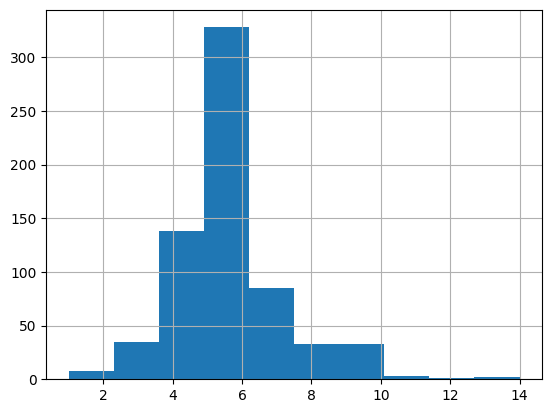

In [92]:
df['m01HHSize'].hist() #Household size as a moderator

In [93]:
ll = list(range(len(LikertData.columns)))

In [94]:
ll = list(range(len(LikertData.columns)))
r = [ScoreAndReverseAColumnIfNecessary(LikertData.iloc[:,x]) for x in ll]
ScoredAndReversedData = pd.DataFrame(r).T
ScoredAndReversedData.index = df.index

In [95]:
ScoredAndReversedData = pd.DataFrame(r).T

In [96]:
ScoredAndReversedData.index = df.index

In [97]:
COLUMNS = ScoredAndReversedData.columns.values.tolist()

In [98]:
ScoredAndReversedData

,c05bfin01,c05bfin02R,c05bfin03,c05bfin04,c05bfin05,c05bfin06R,c05bfin07,c05bfin08R,c05bfin09R,c05bfin10,...,d13bfi251R,d13bfi252,d13bfi253,d13bfi254,d13bfi255R,d13bfi256,d13bfi257,d13bfi258R,d13bfi259,d13bfi260
FAMID,,,,,,,,,,,,,,,,,,,,,
5012,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5014,3.0,3.0,3.0,1.0,3.0,3.0,3.0,2.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5030,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5031,3.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0
5041,2.0,2.0,3.0,1.0,2.0,2.0,3.0,4.0,1.0,4.0,...,3.0,3.0,3.0,1.0,2.0,3.0,3.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8572,1.0,4.0,4.0,2.0,3.0,1.0,4.0,3.0,1.0,2.0,...,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0
8900,3.0,4.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

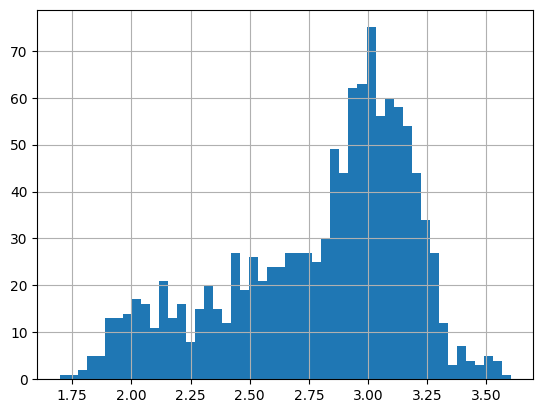

In [100]:
ScoredAndReversedData.mean(axis=0).hist(bins=50)

### Parceling the Data

In [101]:
#from Table s3 of Ringwald Et al. See page 8, https://osf.io/x7hd5
#also from the CFP master syntax file

In [239]:
## Extraversion

In [102]:
Extraversion_Parcel1_bfi = ['01','21R','36']
Extraversion_Parcel1_bfi2 = ['46','16R','01','26R']

Extraversion_Parcel2_bfi = ['11','26']
Extraversion_Parcel2_bfi2 = ['41','06','11R','36R']

Extraversion_Parcel3_bfi = ['16','31R','06R']
Extraversion_Parcel3_bfi2 = ['56','31R','21','51R']

EParcels_BFI1 = [Extraversion_Parcel1_bfi,Extraversion_Parcel2_bfi,Extraversion_Parcel3_bfi]
EParcels_BFI2 = [Extraversion_Parcel1_bfi2,Extraversion_Parcel2_bfi2,Extraversion_Parcel3_bfi2]

EParcels_BFI1_Dict = {}
for l in list(zip(['E1','E2','E3'],EParcels_BFI1)):
    EParcels_BFI1_Dict[l[0]] = l[1]

EParcels_BFI2_Dict = {}
for l in list(zip(['E1','E2','E3'],EParcels_BFI2)):
    EParcels_BFI2_Dict[l[0]] = l[1]

In [103]:
### Conscientiousness


In [104]:
Conscientiousness_Parcel1_bfi = ['03','18R','33']
Conscientiousness_Parcel1_bfi2 = ['03R','38','13','48R']

Conscientiousness_Parcel2_bfi = ['08R','23R','38']
Conscientiousness_Parcel2_bfi2 = ['28R','08R','18','33']

Conscientiousness_Parcel3_bfi = ['13','28','43R']
Conscientiousness_Parcel3_bfi2 = ['43','53','23R','58R']

CParcels_BFI1 = [Conscientiousness_Parcel1_bfi,Conscientiousness_Parcel2_bfi,Conscientiousness_Parcel3_bfi]
CParcels_BFI2 = [Conscientiousness_Parcel1_bfi2,Conscientiousness_Parcel2_bfi2,Conscientiousness_Parcel3_bfi2]

CParcels_BFI1_Dict = {}
for l in list(zip(['C1','C2','C3'],CParcels_BFI1)):
    CParcels_BFI1_Dict[l[0]] = l[1]

CParcels_BFI2_Dict = {}
for l in list(zip(['C1','C2','C3'],CParcels_BFI2)):
    CParcels_BFI2_Dict[l[0]] = l[1]


In [105]:
### Neuroticism

In [106]:
Neuroticism_Parcel1_bfi = ['04','19','34R']
Neuroticism_Parcel1_bfi2 = ['54','34','09R','44R','49R']

Neuroticism_Parcel2_bfi = ['09R','29','39']
Neuroticism_Parcel2_bfi2 = ['04R','14','24R','59']

Neuroticism_Parcel3_bfi = ['14','24R']
Neuroticism_Parcel3_bfi2 = ['19','29R','39']

NParcels_BFI1 = [Neuroticism_Parcel1_bfi,Neuroticism_Parcel2_bfi,Neuroticism_Parcel3_bfi]
NParcels_BFI2 = [Neuroticism_Parcel1_bfi2,Neuroticism_Parcel2_bfi2,Neuroticism_Parcel3_bfi2]

NParcels_BFI1_Dict = {}
for l in list(zip(['N1','N2','N3'],NParcels_BFI1)):
    NParcels_BFI1_Dict[l[0]] = l[1]

NParcels_BFI2_Dict = {}
for l in list(zip(['N1','N2','N3'],NParcels_BFI2)):
    NParcels_BFI2_Dict[l[0]] = l[1]


In [107]:
## Agreeableness

In [108]:
Agreeableness_Parcel1_bfi = ['02R','17','32']
Agreeableness_Parcel1_bfi2 = ['12R','27','02','52']

Agreeableness_Parcel2_bfi = ['07','22','37R']
Agreeableness_Parcel2_bfi2 = ['32','37R','07','42R','17R']

Agreeableness_Parcel3_bfi = ['12R','27R','42']
Agreeableness_Parcel3_bfi2 = ['22R','47R','57']

AParcels_BFI1 = [Agreeableness_Parcel1_bfi,Agreeableness_Parcel2_bfi,Agreeableness_Parcel3_bfi]
AParcels_BFI2 = [Agreeableness_Parcel1_bfi2,Agreeableness_Parcel2_bfi2,Agreeableness_Parcel3_bfi2]

AParcels_BFI1_Dict = {}
for l in list(zip(['A1','A2','A3'],AParcels_BFI1)):
    AParcels_BFI1_Dict[l[0]] = l[1]

AParcels_BFI2_Dict = {}
for l in list(zip(['A1','A2','A3'],AParcels_BFI2)):
    AParcels_BFI2_Dict[l[0]] = l[1]


In [109]:
## Openness

In [110]:
Openness_Parcel1_bfi = ['05','20','44']
Openness_Parcel1_bfi2 = ['60','20','25R','45R']

Openness_Parcel2_bfi = ['10','25','41R']
Openness_Parcel2_bfi2 = ['10','15','05R','50R']

Openness_Parcel3_bfi = ['15','30','40','20']
Openness_Parcel3_bfi2 = ['40','35','30R','55R']

OParcels_BFI1 = [Openness_Parcel1_bfi,Openness_Parcel2_bfi,Openness_Parcel3_bfi]
OParcels_BFI2 = [Openness_Parcel1_bfi2,Openness_Parcel2_bfi2,Openness_Parcel3_bfi2]

OParcels_BFI1_Dict = {}
for l in list(zip(['O1','O2','O3'],OParcels_BFI1)):
    OParcels_BFI1_Dict[l[0]] = l[1]

OParcels_BFI2_Dict = {}
for l in list(zip(['O1','O2','O3'],OParcels_BFI2)):
    OParcels_BFI2_Dict[l[0]] = l[1]


In [111]:
OParcels_BFI1_Dict

{'O1': ['05', '20', '44'],
 'O2': ['10', '25', '41R'],
 'O3': ['15', '30', '40', '20']}

In [112]:
 EParcels_BFI1_Dict | AParcels_BFI1_Dict | CParcels_BFI1_Dict | NParcels_BFI1_Dict | OParcels_BFI1_Dict

{'E1': ['01', '21R', '36'],
 'E2': ['11', '26'],
 'E3': ['16', '31R', '06R'],
 'A1': ['02R', '17', '32'],
 'A2': ['07', '22', '37R'],
 'A3': ['12R', '27R', '42'],
 'C1': ['03', '18R', '33'],
 'C2': ['08R', '23R', '38'],
 'C3': ['13', '28', '43R'],
 'N1': ['04', '19', '34R'],
 'N2': ['09R', '29', '39'],
 'N3': ['14', '24R'],
 'O1': ['05', '20', '44'],
 'O2': ['10', '25', '41R'],
 'O3': ['15', '30', '40', '20']}

In [113]:
 EParcels_BFI2_Dict | AParcels_BFI2_Dict | CParcels_BFI2_Dict | NParcels_BFI2_Dict | OParcels_BFI2_Dict

{'E1': ['46', '16R', '01', '26R'],
 'E2': ['41', '06', '11R', '36R'],
 'E3': ['56', '31R', '21', '51R'],
 'A1': ['12R', '27', '02', '52'],
 'A2': ['32', '37R', '07', '42R', '17R'],
 'A3': ['22R', '47R', '57'],
 'C1': ['03R', '38', '13', '48R'],
 'C2': ['28R', '08R', '18', '33'],
 'C3': ['43', '53', '23R', '58R'],
 'N1': ['54', '34', '09R', '44R', '49R'],
 'N2': ['04R', '14', '24R', '59'],
 'N3': ['19', '29R', '39'],
 'O1': ['60', '20', '25R', '45R'],
 'O2': ['10', '15', '05R', '50R'],
 'O3': ['40', '35', '30R', '55R']}

In [114]:
BFI_PARCELS = Extraversion_Parcel1_bfi + Extraversion_Parcel2_bfi + \
Extraversion_Parcel3_bfi + Conscientiousness_Parcel1_bfi + Conscientiousness_Parcel2_bfi + Conscientiousness_Parcel3_bfi  + \
Neuroticism_Parcel1_bfi  + Neuroticism_Parcel2_bfi+ Neuroticism_Parcel3_bfi + Agreeableness_Parcel1_bfi + \
Agreeableness_Parcel2_bfi + Agreeableness_Parcel3_bfi  + \
Openness_Parcel1_bfi + Openness_Parcel2_bfi + Openness_Parcel3_bfi

In [115]:
#sorted(BFI_PARCELS) #20 is repeated twice, that's an error in Whitney's code?

In [116]:
BFI2_PARCELS = flatten(EParcels_BFI2 + CParcels_BFI2  + NParcels_BFI2 + AParcels_BFI2 + OParcels_BFI2)

In [117]:
len(BFI2_PARCELS)

60

In [254]:
#sorted(BFI2_PARCELS)

In [118]:
# Do Bfi and bfi2 seperately
def ParcelTheData(Data,Measure,ParcelMapping):
    """
        This function takes a dictionary of per-factor parcel mappings, and returns a dataframe of all of those parcels
        created for each person (mom, dad, child) in each relevant wave.

        Note that the "Measure" variable has to line up the the ParcelMapping in terms of it describes the BFI or BFI2
      
      
      ParcelMapping is a dictionary like
    {'E1': ['01', '21R', '36'], 'E2': ['11', '26'], 'E3': ['16', '31R', '06R']}
    
      Measure is either "bfin" or bfi2"

      
    """
    if Measure == 'bfi':
        print('ERROR, try again with the argument "bfi2"')
    else:
        ParceledColumns = []
        for ParcelName,ParcelMap in ParcelMapping.items():
            
            item_names = [Measure+ x for x in ParcelMap]
            
            for Person in ['c','d','m']:
                if Person == 'c':
                    Waves = ChildWaves #defined above
    
                    #Now that we have the waves, we need to get the ones relevant to either the BFI or BFI2
                    
                    if Measure == 'bfin':
                        Wavez = Waves[0:2]
                    elif Measure == 'bfi2': 
                        Wavez = Waves[2:]
                        
                elif Person == 'd':
                    Waves = DadWaves
    
                    if Measure == 'bfin':
                        Wavez = Waves[0:4]
                    elif Measure == 'bfi2': 
                        Wavez = Waves[4:]
    
                 
                elif Person == 'm':
                    Waves = MomWaves
    
                    if Measure == 'bfin':
                        Wavez = Waves[0:4]
                    elif Measure == 'bfi2': 
                        Wavez = Waves[4:]
    
                for Wave in Wavez:
    
                    RelevantColumns = [Wave+X for X in item_names] 
                    #print(RelevantColumns)
                    ParcelScores = ScoredAndReversedData[RelevantColumns].mean(axis=1) #Returns the row-wise mean (Double Check)
                    ParcelScores.name = Wave+"_"+ParcelName 
                    ParceledColumns.append(ParcelScores)
                        
        return pd.DataFrame(ParceledColumns).T


In [119]:
EParcels_BFI1_Dict

{'E1': ['01', '21R', '36'], 'E2': ['11', '26'], 'E3': ['16', '31R', '06R']}

In [120]:
BFI2_data = [ParcelTheData(ScoredAndReversedData,'bfi2',MAPPING) for MAPPING in [EParcels_BFI2_Dict,
                                                                     CParcels_BFI2_Dict,
                                                                     NParcels_BFI2_Dict,
                                                                     AParcels_BFI2_Dict,
                                                                     OParcels_BFI2_Dict]]

In [121]:
bfi2_processed = pd.concat(BFI2_data,axis=1)

In [122]:
bfi2_processed

,c10_E1,c11_E1,c12_E1,c13_E1,d11_E1,d12_E1,d13_E1,m10_E1,m11_E1,m12_E1,...,c11_O3,c12_O3,c13_O3,d11_O3,d12_O3,d13_O3,m10_O3,m11_O3,m12_O3,m13_O3
FAMID,,,,,,,,,,,,,,,,,,,,,
5012,3.00,2.50,2.75,3.00,3.00,2.50,NaN,2.75,3.00,2.75,...,2.50,2.50,2.75,3.00,2.500000,NaN,2.666667,2.75,2.50,2.75
5014,2.50,NaN,NaN,NaN,NaN,NaN,NaN,2.50,2.25,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2.250000,2.25,2.75,2.50
5030,3.00,3.00,2.50,2.75,3.25,NaN,NaN,2.25,2.50,NaN,...,3.00,3.00,3.25,3.00,NaN,NaN,2.500000,2.50,NaN,NaN
5031,2.75,2.25,2.25,NaN,2.50,2.25,2.25,2.75,2.75,2.75,...,2.75,2.75,NaN,3.00,2.333333,2.50,2.750000,3.00,2.75,3.00
5041,2.75,2.50,3.00,NaN,2.75,3.00,2.50,NaN,3.25,2.75,...,3.75,2.25,NaN,2.75,3.000000,2.75,NaN,2.75,3.00,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,4.00,NaN,NaN,3.75,NaN,NaN,NaN,4.00,3.50,3.25,...,NaN,NaN,3.75,NaN,NaN,NaN,3.250000,2.50,3.25,3.75
8572,2.50,2.50,2.75,2.75,3.25,2.75,2.75,3.00,3.00,3.00,...,2.75,2.75,2.50,2.75,2.500000,2.50,2.250000,2.50,2.75,2.50
8900,2.50,3.00,2.75,3.50,2.50,NaN,NaN,3.00,2.75,2.50,...,3.75,3.75,4.00,2.75,NaN,NaN,3.250000,2.50,2.50,2.75


In [123]:
BFI_data = [ParcelTheData(ScoredAndReversedData,'bfin',MAPPING) for MAPPING in [EParcels_BFI1_Dict,
                                                                     CParcels_BFI1_Dict,
                                                                     NParcels_BFI1_Dict,
                                                                     AParcels_BFI1_Dict,
                                                                     OParcels_BFI1_Dict]]

In [124]:
bfi_processed = pd.concat(BFI_data,axis=1)

In [125]:
bfi_processed

,c05_E1,c07_E1,d01_E1,d03_E1,d05_E1,d07_E1,m01_E1,m03_E1,m05_E1,m07_E1,...,c05_O3,c07_O3,d01_O3,d03_O3,d05_O3,d07_O3,m01_O3,m03_O3,m05_O3,m07_O3
FAMID,,,,,,,,,,,,,,,,,,,,,
5012,3.000000,2.333333,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,...,2.75,2.75,NaN,NaN,NaN,NaN,3.00,3.00,3.00,3.00
5014,2.333333,2.333333,NaN,2.333333,3.000000,NaN,2.666667,2.333333,2.000000,2.000000,...,2.75,2.50,NaN,3.00,2.75,NaN,2.25,3.00,2.50,2.00
5030,3.000000,NaN,4.000000,4.000000,3.666667,NaN,2.000000,2.666667,1.333333,NaN,...,3.00,NaN,3.75,3.50,2.75,NaN,3.25,2.75,2.50,NaN
5031,3.000000,2.666667,2.333333,NaN,2.333333,2.000000,2.666667,2.666667,2.333333,2.333333,...,2.75,3.00,3.00,NaN,2.75,3.00,3.00,3.50,3.00,3.25
5041,2.666667,2.666667,NaN,3.000000,2.666667,3.333333,3.000000,3.000000,3.000000,3.000000,...,2.50,2.50,NaN,3.00,3.00,3.00,3.00,3.25,3.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NaN,NaN,NaN,NaN,NaN,NaN,3.666667,3.333333,2.666667,3.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,3.50,2.50,2.75,3.50
8572,1.333333,2.666667,3.333333,2.333333,2.666667,2.000000,3.000000,3.333333,3.000000,3.000000,...,2.25,2.50,3.00,2.75,3.00,3.75,3.00,3.00,3.00,2.75
8900,2.666667,2.666667,NaN,NaN,NaN,2.666667,NaN,3.000000,3.000000,3.000000,...,3.00,3.50,NaN,NaN,NaN,3.00,NaN,3.50,3.25,3.00


In [127]:
ParcledData = pd.concat([bfi_processed,bfi2_processed],axis=1)
ParcledData.to_csv("ParcledData_6_26_2024__Wave13__FULL__NOT_CENTERED.csv",index=True)

# CENTERING RELATIVE TO BASELINE WAVE

In [128]:
def CenterAccordingToBaselineWaves(DataFrame,SearchString='c05|m01|d01'):
    """Given a dataframe of personality parcels in standard CFP format (e.g., m05_E3, d01_A2),
    and given a search string like 'c05|m01|d01' this function will cycle through all Big Five parcels,
    and standardize them to the waves specified in the search string.
    
    !!!Use SearchString == 'm01|d01|c05' to standardized to the **baseline** waves.!!!
    """
    
    df = DataFrame
    Columns = df.columns
    ParcelsSuffixes = ['_E1', '_E2','_E3',
                         '_C1','_C2','_C3',
                         '_N1','_N2','_N3',
                         '_A1', '_A2','_A3',
                         '_O1','_O2','_O3']
    descriptives = df[Columns[df.columns.str.contains(SearchString)]].describe().T[['mean','std']] #auto excludes nans 
    result = []
    ##This loops through 'child','mom','dad', finds the baseline stats as computed via the 'descriptives = ' line above and specified by the SearchString.
    for person in ['c','m','d']:
        DataSubset = df[Columns[Columns.str.contains(person)]]
        CurrentColumns = DataSubset.columns
        for Parcel in ParcelsSuffixes:
            #print(person,Parcel)
            StatRow = descriptives[descriptives.index.str.contains(Parcel)]
            StatRow = StatRow[StatRow.index.str.contains(person)]
            ParcelData = DataSubset[CurrentColumns[CurrentColumns.str.contains(Parcel)]]
            data_meanadjusted =  ParcelData - StatRow['mean'].values.tolist()[0]
            data =  data_meanadjusted/StatRow['std'].values.tolist()[0]
            result.append(data)
    return pd.concat(result,axis=1)    

In [129]:
CenteredParcelData = CenterAccordingToBaselineWaves(ParcledData)

In [130]:
CenteredParcelData['c05_E1'].mean()

6.176075103875043e-17

In [131]:
CenteredParcelData['c05_E1'].mean()

6.176075103875043e-17

In [132]:
CenteredParcelData['c05_E1'].std()

1.0000000000000013

In [133]:
CenteredParcelData.to_csv("ParceledData_ZScoredToBaselineWave_6_26_2024.csv")

In [134]:
CenteredParcelData

,c05_E1,c07_E1,c10_E1,c11_E1,c12_E1,c13_E1,c05_E2,c07_E2,c10_E2,c11_E2,...,d11_O2,d12_O2,d13_O2,d01_O3,d03_O3,d05_O3,d07_O3,d11_O3,d12_O3,d13_O3
FAMID,,,,,,,,,,,,,,,,,,,,,
5012,0.162960,-1.079030,0.162960,-0.768532,-0.302786,0.162960,0.747371,-0.249124,-0.747371,-1.245618,...,0.259631,-0.319508,NaN,NaN,NaN,NaN,NaN,-0.283013,-1.547942,NaN
5014,-1.079030,-1.079030,-0.768532,NaN,NaN,NaN,-0.249124,-1.245618,-0.249124,NaN,...,NaN,NaN,NaN,NaN,-0.283013,-0.915478,NaN,NaN,NaN,NaN
5030,0.162960,NaN,0.162960,0.162960,-0.768532,-0.302786,-0.249124,NaN,-0.249124,0.747371,...,-0.898647,NaN,NaN,1.614380,0.981915,-0.915478,NaN,-0.283013,NaN,NaN
5031,0.162960,-0.458035,-0.302786,-1.234278,-1.234278,NaN,-0.249124,-0.249124,-0.747371,-1.245618,...,1.417908,-1.477786,-0.319508,-0.283013,NaN,-0.915478,-0.283013,-0.283013,-1.969585,-1.547942
5041,-0.458035,-0.458035,-0.302786,-0.768532,0.162960,NaN,-0.249124,-1.245618,-0.249124,-0.249124,...,0.259631,0.838770,0.838770,NaN,-0.283013,-0.283013,-0.283013,-0.915478,-0.283013,-0.915478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NaN,NaN,2.025944,NaN,NaN,1.560198,NaN,NaN,1.245618,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8572,-2.942014,-0.458035,-0.768532,-0.768532,-0.302786,-0.302786,-3.238607,-1.245618,-0.249124,-0.747371,...,0.259631,0.838770,-0.898647,-0.283013,-0.915478,-0.283013,1.614380,-0.915478,-1.547942,-1.547942
8900,-0.458035,-0.458035,-0.768532,0.162960,-0.302786,1.094452,-1.245618,0.747371,-1.245618,-0.747371,...,0.259631,NaN,NaN,NaN,NaN,NaN,-0.283013,-0.915478,NaN,NaN
